In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize
from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")



In [6]:
df0 = pd.read_csv("autoscout_missing_value.csv")
df = df0.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make_model        15919 non-null  object 
 1   body_type         15919 non-null  object 
 2   price             15919 non-null  int64  
 3   vat               15919 non-null  object 
 4   km                15919 non-null  int64  
 5   hp                15919 non-null  float64
 6   type              15919 non-null  object 
 7   previous_owners   15919 non-null  float64
 8   warranty          15919 non-null  object 
 9   paint_type        15919 non-null  object 
 10  nr_of_doors       15919 non-null  float64
 11  nr_of_seats       15919 non-null  float64
 12  gearing_type      15919 non-null  object 
 13  displacement      15919 non-null  float64
 14  weight            15919 non-null  float64
 15  drive_chain       15919 non-null  object 
 16  fuel              15919 non-null  object

In [5]:
df.drop(["electricity_consumption", "last_service_date", "availability", "available_from",  "country_version"], axis = 1, inplace = True)


KeyboardInterrupt



In [ ]:
df.first_registration.value_counts(dropna=False)

2018-01-01    4522
2016-01-01    3674
2017-01-01    3273
2019-01-01    2853
NaN           1597
Name: first_registration, dtype: int64

In [ ]:
df.registration.value_counts(dropna=False)

NaN           1597
2018-03-01     695
2019-02-01     585
2018-05-01     572
2019-03-01     543
2019-01-01     541
2018-04-01     541
2018-02-01     539
2016-03-01     536
2016-04-01     532
2018-06-01     532
2018-01-01     511
2019-04-01     506
2016-02-01     472
2017-03-01     471
2016-05-01     459
2016-06-01     452
2019-05-01     440
2017-06-01     409
2017-05-01     404
2018-07-01     396
2017-04-01     380
2016-01-01     376
2017-02-01     368
2017-01-01     306
2018-08-01     285
2019-06-01     224
2017-07-01     215
2017-11-01     180
2016-07-01     176
2016-10-01     160
2017-10-01     154
2017-09-01     149
2016-11-01     142
2018-09-01     141
2016-09-01     141
2016-12-01     134
2017-12-01     123
2017-08-01     114
2018-11-01     110
2018-12-01     103
2018-10-01      97
2016-08-01      94
2019-07-01       6
2019-09-01       5
2019-08-01       1
2019-11-01       1
2019-12-01       1
Name: registration, dtype: int64

In [ ]:
df["registration"].astype("datetime64")

0       2016-01-01
1       2017-03-01
2       2016-02-01
3       2016-08-01
4       2016-05-01
           ...    
15914          NaT
15915   2019-01-01
15916   2019-03-01
15917   2019-06-01
15918   2019-01-01
Name: registration, Length: 15919, dtype: datetime64[ns]

In [ ]:
df["age"] = 2019 - df["registration"].astype("datetime64").dt.year


In [ ]:
df["age"]

0        3.0
1        2.0
2        3.0
3        3.0
4        3.0
        ... 
15914    NaN
15915    0.0
15916    0.0
15917    0.0
15918    0.0
Name: age, Length: 15919, dtype: float64

In [ ]:
df.drop(["registration", "first_registration"], axis=1, inplace=True)
df["age"]

0        3.0
1        2.0
2        3.0
3        3.0
4        3.0
        ... 
15914    NaN
15915    0.0
15916    0.0
15917    0.0
15918    0.0
Name: age, Length: 15919, dtype: float64

## body_type

In [ ]:
df.groupby("make_model")[["body_type", "nr_of_doors" ]].value_counts(dropna=False)

make_model      body_type  nr_of_doors
Audi A1         Sedans     5.0            1048
                Compact    5.0             666
                Sedans     4.0             321
                Compact    4.0             207
                Sedans     3.0             130
                                          ... 
Renault Espace  Off-Road   4.0               1
                Coupe      NaN               1
                           5.0               1
                Compact    4.0               1
                Van        7.0               1
Length: 137, dtype: int64

In [ ]:
df[df['body_type'].isna()][["make_model", "body_type","nr_of_doors", "nr_of_seats", "hp", "gearing_type"]]

,make_model,body_type,nr_of_doors,nr_of_seats,hp,gearing_type
3175,Audi A3,NaN,5.0,5.0,81.0,Manual
3255,Audi A3,NaN,3.0,5.0,81.0,Automatic
3975,Audi A3,NaN,5.0,5.0,85.0,Automatic
3997,Audi A3,NaN,3.0,NaN,82.0,Automatic
4206,Audi A3,NaN,5.0,NaN,92.0,Manual
4297,Audi A3,NaN,5.0,NaN,92.0,Manual
4298,Audi A3,NaN,5.0,NaN,92.0,Manual
5718,Opel Astra,NaN,5.0,NaN,100.0,Automatic
5938,Opel Astra,NaN,5.0,NaN,100.0,Automatic
5940,Opel Astra,NaN,5.0,NaN,100.0,Automatic


In [ ]:
# 1
f = lambda x: x.mode().iloc[0]
df["body_type"] = df["body_type"].fillna(df.groupby("make_model")["body_type"].transform(f))

In [ ]:
# opsion 2/ 
# for group in list(df["make_model"].unique()):
#     cond = df["make_model"] == group
#     mode = list(df[cond]["body_type"].mode())
#     if mode != []:
#         df.loc[cond, "body_type"] = df.loc[cond, "body_type"].fillna(df[cond]["body_type"].mode()[0])
#     else:
#         df.loc[cond, "body_type"] = df.loc[cond, "body_type"].fillna(df["body_type"].mode()[0])

In [ ]:
df["body_type"].value_counts(dropna=False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [ ]:
df["vat"].value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [ ]:
df["vat"].dtype

dtype('O')

In [ ]:
df["vat"] = df["vat"].map(lambda x : "Unknown" if x == "Price negotiable" else x )

In [ ]:
df["vat"].fillna("Unknown", inplace=True)

In [ ]:
df["vat"].value_counts(dropna=False)

VAT deductible    10980
Unknown            4939
Name: vat, dtype: int64

In [ ]:
# pd.concat([df, pd.get_dummies(df.vat, prefix="vat" )], axis=1)


In [ ]:
# df[df['vat'].isna()][["make_model", "vat","nr_of_doors", "nr_of_seats", "hp", "gearing_type"]]

In [ ]:
# df.groupby("make_model")[["vat" ]].value_counts(dropna=False)

In [ ]:
df["km"].isnull().sum()

0

In [ ]:
df["hp"].isnull().sum()

88

In [ ]:
df[df['hp'].isna()][["make_model", "hp","gears", "cylinders", "displacement", "drive_chain"]]

,make_model,hp,gears,cylinders,displacement,drive_chain
1269,Audi A1,NaN,NaN,NaN,NaN,NaN
2500,Audi A1,NaN,5.0,3.0,999.0,front
4259,Audi A3,NaN,NaN,NaN,NaN,NaN
7177,Opel Astra,NaN,NaN,NaN,NaN,NaN
7670,Opel Astra,NaN,6.0,4.0,1398.0,NaN
...,...,...,...,...,...,...
15641,Renault Espace,NaN,NaN,NaN,NaN,NaN
15647,Renault Espace,NaN,NaN,NaN,NaN,NaN
15684,Renault Espace,NaN,NaN,NaN,NaN,NaN
15791,Renault Espace,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.groupby("make_model")["hp"].value_counts(dropna=False)


make_model      hp   
Audi A1         85.0     890
                70.0     791
                66.0     465
                92.0     172
                60.0     156
                        ... 
Renault Espace  167.0      2
                115.0      1
                120.0      1
                149.0      1
                150.0      1
Name: hp, Length: 148, dtype: int64

In [ ]:
df.corr(method ='pearson')

,price,km,hp,previous_owners,warranty,nr_of_doors,nr_of_seats,displacement,cylinders,weight,co2_emission,emission_label,gears,comb_consumption,city_consumption,country_consumption,age
price,1.000000,-0.400100,0.693892,-0.119186,0.203521,0.164094,0.257343,0.219811,-0.006954,0.419661,0.022711,-0.103842,0.488886,0.165446,0.166502,0.209249,-0.449787
km,-0.400100,1.000000,-0.000328,0.084301,-0.269317,-0.001613,-0.008608,0.274396,0.222700,0.158633,-0.012875,0.060667,-0.035845,-0.198226,-0.234106,-0.221756,0.735115
hp,0.693892,-0.000328,1.000000,-0.002944,0.070703,0.122800,0.295884,0.497327,0.303342,0.586239,0.047290,0.047740,0.430052,0.216658,0.263825,0.227635,-0.064383
previous_owners,-0.119186,0.084301,-0.002944,1.000000,0.053406,-0.181974,0.004423,0.005963,0.049703,0.052477,0.008665,0.013848,-0.029967,-0.030450,-0.019289,-0.055688,0.225737
warranty,0.203521,-0.269317,0.070703,0.053406,1.000000,-0.029053,0.054084,-0.094217,-0.192534,-0.030430,-0.010067,0.070539,0.010634,0.078276,0.107655,0.091114,-0.292660
nr_of_doors,0.164094,-0.001613,0.122800,-0.181974,-0.029053,1.000000,0.102182,0.069574,0.064377,0.166571,-0.002386,-0.104837,0.109322,-0.030988,-0.067300,-0.022321,-0.073096
nr_of_seats,0.257343,-0.008608,0.295884,0.004423,0.054084,0.102182,1.000000,0.158493,0.228297,0.297760,0.021478,0.019258,0.096465,0.141768,0.141754,0.153631,-0.087182
displacement,0.219811,0.274396,0.497327,0.005963,-0.094217,0.069574,0.158493,1.000000,0.624423,0.562384,0.019135,0.016295,0.281072,0.006489,-0.005315,0.015889,0.184826
cylinders,-0.006954,0.222700,0.303342,0.049703,-0.192534,0.064377,0.228297,0.624423,1.000000,0.264439,0.030853,0.048327,0.129086,0.070725,0.084872,0.067559,0.168909
weight,0.419661,0.158633,0.586239,0.052477,-0.030430,0.166571,0.297760,0.562384,0.264439,1.000000,0.273844,0.013554,0.316745,0.033537,0.008415,0.047925,0.080077


In [ ]:
df['hp'] = df['hp'].fillna(df.groupby('price')['hp'].transform('mean'))
df['hp'].fillna(df.groupby('price')['hp'].transform('mean'))

0         66.0
1        141.0
2         85.0
3         66.0
4         66.0
         ...  
15914    147.0
15915    165.0
15916    146.0
15917    147.0
15918    165.0
Name: hp, Length: 15919, dtype: float64

In [ ]:
f = lambda x: x.median()
df["hp"].fillna(df.groupby("price")["hp"].transform(f), inplace=True)

c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
df["hp"].fillna(df.groupby("body_type")["hp"].transform(f), inplace=True)

In [ ]:
qv("hp")

column name    :  hp
--------------------------------
percent_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  125
85.000000     2542
66.000000     2122
81.000000     1402
100.000000    1308
110.000000    1113
              ... 
56.454545        1
4.000000         1
59.696970        1
68.600000        1
142.000000       1
Name: hp, Length: 125, dtype: int64


In [ ]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [ ]:
# df.groupby(["price", "hp"] ).price.describe()

## type

In [ ]:
df["type"].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

In [ ]:
df["type"].fillna(df["type"].mode().iloc[0], inplace=True)

## previous_owners

In [ ]:
df.previous_owners.value_counts(dropna=False)

1.0    8294
NaN    6665
2.0     778
0.0     163
3.0      17
4.0       2
Name: previous_owners, dtype: int64

In [ ]:
df[["previous_owners", "warranty", "age", "km"]]

,previous_owners,warranty,age,km
0,2.0,NaN,3.0,56013
1,NaN,NaN,2.0,80000
2,1.0,NaN,3.0,83450
3,1.0,NaN,3.0,73000
4,1.0,NaN,3.0,16200
...,...,...,...,...
15914,NaN,24.0,NaN,0
15915,1.0,NaN,0.0,9900
15916,1.0,NaN,0.0,15
15917,NaN,NaN,0.0,10


In [ ]:
df["previous_owners"].describe()

count    9254.000000
mean        1.070780
std         0.325547
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: previous_owners, dtype: float64

In [ ]:
df["previous_owners"].value_counts(dropna=False)

1.0    8294
NaN    6665
2.0     778
0.0     163
3.0      17
4.0       2
Name: previous_owners, dtype: int64

In [ ]:
df["previous_owners"]

0        2.0
1        NaN
2        1.0
3        1.0
4        1.0
        ... 
15914    NaN
15915    1.0
15916    1.0
15917    NaN
15918    1.0
Name: previous_owners, Length: 15919, dtype: float64

In [ ]:
f = lambda x: x.ffill()
df["previous_owners"] = df["previous_owners"].fillna(df.groupby("km")["previous_owners"].transform(f))

In [ ]:
f = lambda x: x.bfill()
df["previous_owners"] = df["previous_owners"].fillna(df.groupby("km")["previous_owners"].transform(f))

In [ ]:
df["previous_owners"].value_counts(dropna=False)

1.0    11773
NaN     2301
2.0     1008
0.0      795
3.0       40
4.0        2
Name: previous_owners, dtype: int64

In [ ]:
f = lambda x: x.mode()
df["previous_owners"] = df["previous_owners"].fillna(df.groupby("age")["previous_owners"].transform(f))

In [ ]:
qv("previous_owners")

column name    :  previous_owners
--------------------------------
percent_of_nulls   :  % 14.45
num_of_nulls   :  2301
num_of_uniques :  5
1.0    11773
NaN     2301
2.0     1008
0.0      795
3.0       40
4.0        2
Name: previous_owners, dtype: int64


In [ ]:
df.groupby(["km", "age"])["previous_owners"].value_counts(dropna=False)

km      age  previous_owners
0       0.0  0.0                519
             1.0                485
        1.0  1.0                 24
             0.0                 14
        2.0  1.0                  1
                               ... 
240000  2.0  NaN                  1
248000  3.0  NaN                  1
260000  3.0  1.0                  1
291800  3.0  1.0                  1
317000  2.0  1.0                  1
Name: previous_owners, Length: 7763, dtype: int64

In [ ]:
df["previous_owners"].fillna(df.groupby(["km"]).transform(lambda x: x.median()))

In [ ]:
df["previous_owners"] = df["previous_owners"].fillna(df.groupby(["age"])["previous_owners"].transform(lambda x: x.median()))

In [ ]:
qv("previous_owners")

column name    :  previous_owners
--------------------------------
percent_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
1.0    14074
2.0     1008
0.0      795
3.0       40
4.0        2
Name: previous_owners, dtype: int64


In [ ]:
df["age"].value_counts(dropna=False)##??

1.0    4522
3.0    3674
2.0    3273
0.0    2853
NaN    1597
Name: age, dtype: int64

## warranty

In [ ]:
df["warranty"].isnull().sum()

11066

In [ ]:
warrantty_list =[12.,  3.,  6., 24., 50., 48., 36., 20., 23., 60., 13., 26.,
       46., 47., 49., 18., 56., 16., 22., 28., 10., 19., 25., 11., 72.,
        2.,  1.,  4.,  8.,  7., 15., 17., 45., 14.,  9., 65., 21., 34.,
       33., 40., 30.]
def warranty_group(x):
    if x in df["warranty"]:
        return 'warranty'
    else:
        return x
    
df['warranty']=df.warranty.apply(warranty_group)


In [ ]:
df["warranty"].value_counts(dropna=False)

NaN         11066
warranty     4853
Name: warranty, dtype: int64

In [ ]:
df["warranty"].fillna("No", inplace=True)

## body_color

In [ ]:
df["body_color"].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

In [ ]:
df.groupby("body_color")["upholstery_colors"].value_counts(dropna=False)


body_color  upholstery_colors
Beige       Black                41
            NaN                  33
            Grey                 20
            Brown                 6
            Other                 6
                                 ..
White       Blue                  1
Yellow      Black                35
            NaN                   9
            Grey                  6
            Other                 1
Name: upholstery_colors, Length: 85, dtype: int64

In [ ]:
df_body_color = df, pd.get_dummies(df.body_color, prefix="bt" )


In [ ]:
df_body_color

(           make_model body_type  price             vat     km     hp  \
 0             Audi A1    Sedans  15770  VAT deductible  56013   66.0   
 1             Audi A1    Sedans  14500         Unknown  80000  141.0   
 2             Audi A1    Sedans  14640  VAT deductible  83450   85.0   
 3             Audi A1    Sedans  14500         Unknown  73000   66.0   
 4             Audi A1    Sedans  16790         Unknown  16200   66.0   
 ...               ...       ...    ...             ...    ...    ...   
 15914  Renault Espace       Van  39950  VAT deductible      0  147.0   
 15915  Renault Espace       Van  39885  VAT deductible   9900  165.0   
 15916  Renault Espace       Van  39875  VAT deductible     15  146.0   
 15917  Renault Espace       Van  39700  VAT deductible     10  147.0   
 15918  Renault Espace       Van  40999  VAT deductible      0  165.0   
 
                  type  previous_owners  warranty body_color  ...  \
 0                Used              2.0       NaN    

In [ ]:
del df["body_color"]

In [ ]:
def qv(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("percent_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [ ]:
qv("paint_type")

column name    :  paint_type
--------------------------------
percent_of_nulls   :  % 36.26
num_of_nulls   :  5772
num_of_uniques :  3
Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64


In [ ]:
df["paint_type"] = df["paint_type"].map(lambda x : "Metallic" if x == "Perl effect" else x )
df["paint_type"].fillna("Uni/basic",inplace=True)

In [ ]:
qv("paint_type")

column name    :  paint_type
--------------------------------
percent_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Metallic     9800
Uni/basic    6119
Name: paint_type, dtype: int64


In [ ]:
qv("nr_of_doors")

column name    :  nr_of_doors
--------------------------------
percent_of_nulls   :  % 1.33
num_of_nulls   :  212
num_of_uniques :  6
5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64


In [ ]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'hp', 'type',
       'previous_owners', 'warranty', 'paint_type', 'nr_of_doors',
       'nr_of_seats', 'gearing_type', 'displacement', 'cylinders', 'weight',
       'drive_chain', 'fuel', 'co2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'emission_label', 'gears', 'upholstery_type',
       'upholstery_colors', 'comb_consumption', 'city_consumption',
       'country_consumption', 'next_inspection', 'inspection_new', 'age'],
      dtype='object')

In [ ]:
df.groupby(["body_type", "make_model"])["nr_of_doors"].value_counts(dropna=False)

body_type  make_model      nr_of_doors
Compact    Audi A1         5.0            666
                           4.0            207
                           3.0             80
                           2.0             69
                           NaN             17
                                         ... 
Van        Renault Clio    5.0              1
           Renault Espace  5.0            704
                           4.0             90
                           NaN              8
                           7.0              1
Name: nr_of_doors, Length: 129, dtype: int64

In [ ]:
fill(df, "body_type", "make_model", "nr_of_doors", "mode")

Number of NaN :  0
------------------
5.0    11787
4.0     3079
3.0      832
2.0      219
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64


In [ ]:
qv("nr_of_seats")

column name    :  nr_of_seats
--------------------------------
percent_of_nulls   :  % 6.14
num_of_nulls   :  977
num_of_uniques :  6
5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64


In [ ]:
fill(df, "body_type", "make_model", "nr_of_seats", "mode")

Number of NaN :  0
------------------
5.0    14308
4.0     1127
7.0      362
2.0      119
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64


In [ ]:
qv("gearing_type")

column name    :  gearing_type
--------------------------------
percent_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3
Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64


In [ ]:
qv("fuel")

column name    :  fuel
--------------------------------
percent_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
Benzine    8136
Diesel     7300
Other       419
LPG/CNG      64
Name: fuel, dtype: int64


In [ ]:
qv("displacement")

column name    :  displacement
--------------------------------
percent_of_nulls   :  % 3.12
num_of_nulls   :  496
num_of_uniques :  77
1598.0    4761
999.0     2438
1398.0    1314
1399.0     749
1229.0     677
          ... 
122.0        1
1198.0       1
1195.0       1
2967.0       1
1800.0       1
Name: displacement, Length: 78, dtype: int64


In [ ]:
df[df['cylinders'] == 4.].groupby("cylinders")["displacement"].value_counts(dropna=False)

cylinders  displacement
4.0        1598.0          3589
           1398.0           831
           1229.0           461
           1461.0           425
           1956.0           407
           1399.0           380
           1490.0           324
           1395.0           232
           1968.0           199
           1149.0           190
           1197.0           175
           1798.0           135
           1618.0           112
           1600.0            98
           1498.0            97
           1248.0            89
           1997.0            63
           1364.0            56
           NaN               42
           2000.0            36
           1400.0            34
           1500.0            24
           999.0             18
           1998.0            18
           1.0               13
           1984.0            10
           160.0              6
           1200.0             6
           998.0              3
           1499.0             3
           898.0

In [ ]:
df.groupby(["cylinders","fuel" ])["displacement"].value_counts(dropna=False)

cylinders  fuel     displacement
1.0        Benzine  1398.0             1
2.0        Diesel   NaN                1
                    1997.0             1
3.0        Benzine  999.0           1504
                    898.0            154
                                    ... 
6.0        Diesel   1598.0             1
                    1600.0             1
                    2967.0             1
8.0        Benzine  999.0              1
           Diesel   NaN                1
Name: displacement, Length: 119, dtype: int64

In [ ]:
fill(df, "cylinders", "hp", "displacement", "median")

c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Number of NaN :  449
------------------
1598.0     4792
999.0      2440
1398.0     1318
1399.0      751
1229.0      679
           ... 
996.0         1
2967.0        1
1856.0        1
16000.0       1
1800.0        1
Name: displacement, Length: 78, dtype: int64


In [ ]:
fill(df, "hp", "hp", "displacement", "ffill")

Number of NaN :  0
------------------
1598.0    4974
999.0     2463
1398.0    1334
1399.0     766
1229.0     706
          ... 
122.0        1
1198.0       1
1195.0       1
2967.0       1
1800.0       1
Name: displacement, Length: 77, dtype: int64


In [ ]:
df.to_csv("autoscout_part2-carsamba.csv", index=False)

## weight

In [ ]:
qv("weight")

column name    :  weight
--------------------------------
percent_of_nulls   :  % 43.81
num_of_nulls   :  6974
num_of_uniques :  434
NaN       6974
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
1960.0       1
1258.0       1
1167.0       1
1331.0       1
2037.0       1
Name: weight, Length: 435, dtype: int64


In [ ]:
df[df["weight"] < 500][["make_model", "body_type", "weight"]]

,make_model,body_type,weight
1143,Audi A1,Compact,102.0
8355,Opel Corsa,Compact,1.0
12779,Opel Insignia,Station wagon,1.0


In [ ]:
df.corr(method ='pearson')


,price,km,hp,previous_owners,nr_of_doors,nr_of_seats,displacement,cylinders,weight,co2_emission,emission_label,gears,comb_consumption,city_consumption,country_consumption,age
price,1.000000,-0.400100,0.695373,-0.136711,0.159339,0.247084,0.220055,-0.006954,0.419661,0.022711,-0.103842,0.488886,0.165446,0.166502,0.209249,-0.449787
km,-0.400100,1.000000,-0.002063,0.187352,0.004535,-0.008920,0.273182,0.222700,0.158633,-0.012875,0.060667,-0.035845,-0.198226,-0.234106,-0.221756,0.735115
hp,0.695373,-0.002063,1.000000,0.000203,0.118384,0.286072,0.496401,0.303163,0.586153,0.047277,0.047744,0.431067,0.216969,0.263606,0.226250,-0.065699
previous_owners,-0.136711,0.187352,0.000203,1.000000,-0.149735,-0.007309,0.076894,0.085511,0.081047,0.006678,0.046694,-0.004715,-0.053859,-0.045508,-0.070505,0.250217
nr_of_doors,0.159339,0.004535,0.118384,-0.149735,1.000000,0.100594,0.069253,0.064295,0.166017,-0.002374,-0.105014,0.108893,-0.030508,-0.066568,-0.021972,-0.068246
nr_of_seats,0.247084,-0.008920,0.286072,-0.007309,0.100594,1.000000,0.151669,0.219708,0.293938,0.021377,0.018836,0.093495,0.133059,0.140907,0.152881,-0.085352
displacement,0.220055,0.273182,0.496401,0.076894,0.069253,0.151669,1.000000,0.618846,0.561218,0.019125,0.016362,0.280713,0.006570,-0.005173,0.016011,0.183972
cylinders,-0.006954,0.222700,0.303163,0.085511,0.064295,0.219708,0.618846,1.000000,0.264439,0.030853,0.048327,0.129086,0.070725,0.084872,0.067559,0.168909
weight,0.419661,0.158633,0.586153,0.081047,0.166017,0.293938,0.561218,0.264439,1.000000,0.273844,0.013554,0.316745,0.033537,0.008415,0.047925,0.080077
co2_emission,0.022711,-0.012875,0.047277,0.006678,-0.002374,0.021377,0.019125,0.030853,0.273844,1.000000,-0.008360,0.009396,0.053492,0.061413,0.054501,-0.015768


In [ ]:
fill(df, "make_model", "body_type", "weight", "median")

c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\m

Number of NaN :  0
------------------
1163.0    1547
1350.0    1147
1623.0     877
1195.0     703
1180.0     694
          ... 
1258.0       1
1167.0       1
1331.0       1
1132.0       1
2037.0       1
Name: weight, Length: 440, dtype: int64


In [ ]:
df.groupby(["make_model", "body_type"])["weight"].value_counts(dropna=False)

make_model      body_type  weight
Audi A1         Compact    1180.0    612
                           1165.0     77
                           1200.0     65
                           1135.0     53
                           1195.0     40
                                    ... 
Renault Espace  Van        1939.0      1
                           1975.0      1
                           2037.0      1
                           2353.0      1
                           2410.0      1
Name: weight, Length: 907, dtype: int64

In [ ]:
df.groupby(["make_model", "body_type"])["weight"].value_counts(dropna=False)

make_model      body_type  weight
Audi A1         Compact    1180.0    612
                           1165.0     77
                           1200.0     65
                           1135.0     53
                           1195.0     40
                                    ... 
Renault Espace  Van        1939.0      1
                           1975.0      1
                           2037.0      1
                           2353.0      1
                           2410.0      1
Name: weight, Length: 907, dtype: int64

In [ ]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'hp', 'type',
       'previous_owners', 'warranty', 'paint_type', 'nr_of_doors',
       'nr_of_seats', 'gearing_type', 'displacement', 'cylinders', 'weight',
       'drive_chain', 'fuel', 'co2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'emission_label', 'gears', 'upholstery_type',
       'upholstery_colors', 'comb_consumption', 'city_consumption',
       'country_consumption', 'next_inspection', 'inspection_new', 'age'],
      dtype='object')

In [ ]:
df.corr(method ='pearson')

,price,km,hp,previous_owners,nr_of_doors,nr_of_seats,displacement,cylinders,weight,co2_emission,emission_label,gears,comb_consumption,city_consumption,country_consumption,age
price,1.000000,-0.400100,0.695373,-0.136711,0.159339,0.247084,0.220055,-0.006954,0.465311,0.022711,-0.103842,0.488886,0.165446,0.166502,0.209249,-0.449787
km,-0.400100,1.000000,-0.002063,0.187352,0.004535,-0.008920,0.273182,0.222700,0.149056,-0.012875,0.060667,-0.035845,-0.198226,-0.234106,-0.221756,0.735115
hp,0.695373,-0.002063,1.000000,0.000203,0.118384,0.286072,0.496401,0.303163,0.642750,0.047277,0.047744,0.431067,0.216969,0.263606,0.226250,-0.065699
previous_owners,-0.136711,0.187352,0.000203,1.000000,-0.149735,-0.007309,0.076894,0.085511,0.039231,0.006678,0.046694,-0.004715,-0.053859,-0.045508,-0.070505,0.250217
nr_of_doors,0.159339,0.004535,0.118384,-0.149735,1.000000,0.100594,0.069253,0.064295,0.155957,-0.002374,-0.105014,0.108893,-0.030508,-0.066568,-0.021972,-0.068246
nr_of_seats,0.247084,-0.008920,0.286072,-0.007309,0.100594,1.000000,0.151669,0.219708,0.311421,0.021377,0.018836,0.093495,0.133059,0.140907,0.152881,-0.085352
displacement,0.220055,0.273182,0.496401,0.076894,0.069253,0.151669,1.000000,0.618846,0.474201,0.019125,0.016362,0.280713,0.006570,-0.005173,0.016011,0.183972
cylinders,-0.006954,0.222700,0.303163,0.085511,0.064295,0.219708,0.618846,1.000000,0.285467,0.030853,0.048327,0.129086,0.070725,0.084872,0.067559,0.168909
weight,0.465311,0.149056,0.642750,0.039231,0.155957,0.311421,0.474201,0.285467,1.000000,0.027617,0.040887,0.334118,0.061254,0.040782,0.072791,0.065791
co2_emission,0.022711,-0.012875,0.047277,0.006678,-0.002374,0.021377,0.019125,0.030853,0.027617,1.000000,-0.008360,0.009396,0.053492,0.061413,0.054501,-0.015768


## drive_chain

In [ ]:
qv("drive_chain")

column name    :  drive_chain
--------------------------------
percent_of_nulls   :  % 43.08
num_of_nulls   :  6858
num_of_uniques :  3
front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64


In [ ]:
df.groupby(["make_model", "body_type"])["drive_chain"].value_counts(dropna=False)

make_model      body_type    drive_chain
Audi A1         Compact      front          685
                             NaN            352
                             4WD              2
                Coupe        NaN              2
                Other        front           12
                                           ... 
Renault Espace  Transporter  front            6
                             4WD              1
                Van          NaN            391
                             front          374
                             4WD             38
Name: drive_chain, Length: 107, dtype: int64

In [ ]:
fill(df, "make_model", "body_type", "drive_chain", "mode")

Number of NaN :  0
------------------
front    15711
4WD        204
rear         4
Name: drive_chain, dtype: int64


## fuel

In [ ]:
qv("fuel")

column name    :  fuel
--------------------------------
percent_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
Benzine    8136
Diesel     7300
Other       419
LPG/CNG      64
Name: fuel, dtype: int64


## co2_emission

In [ ]:
df.corr(method ='pearson')

,price,km,hp,previous_owners,nr_of_doors,nr_of_seats,displacement,cylinders,weight,co2_emission,emission_label,gears,comb_consumption,city_consumption,country_consumption,age
price,1.000000,-0.400100,0.695373,-0.136711,0.159339,0.247084,0.220055,-0.006954,0.465311,0.022711,-0.103842,0.488886,0.165446,0.166502,0.209249,-0.449787
km,-0.400100,1.000000,-0.002063,0.187352,0.004535,-0.008920,0.273182,0.222700,0.149056,-0.012875,0.060667,-0.035845,-0.198226,-0.234106,-0.221756,0.735115
hp,0.695373,-0.002063,1.000000,0.000203,0.118384,0.286072,0.496401,0.303163,0.642750,0.047277,0.047744,0.431067,0.216969,0.263606,0.226250,-0.065699
previous_owners,-0.136711,0.187352,0.000203,1.000000,-0.149735,-0.007309,0.076894,0.085511,0.039231,0.006678,0.046694,-0.004715,-0.053859,-0.045508,-0.070505,0.250217
nr_of_doors,0.159339,0.004535,0.118384,-0.149735,1.000000,0.100594,0.069253,0.064295,0.155957,-0.002374,-0.105014,0.108893,-0.030508,-0.066568,-0.021972,-0.068246
nr_of_seats,0.247084,-0.008920,0.286072,-0.007309,0.100594,1.000000,0.151669,0.219708,0.311421,0.021377,0.018836,0.093495,0.133059,0.140907,0.152881,-0.085352
displacement,0.220055,0.273182,0.496401,0.076894,0.069253,0.151669,1.000000,0.618846,0.474201,0.019125,0.016362,0.280713,0.006570,-0.005173,0.016011,0.183972
cylinders,-0.006954,0.222700,0.303163,0.085511,0.064295,0.219708,0.618846,1.000000,0.285467,0.030853,0.048327,0.129086,0.070725,0.084872,0.067559,0.168909
weight,0.465311,0.149056,0.642750,0.039231,0.155957,0.311421,0.474201,0.285467,1.000000,0.027617,0.040887,0.334118,0.061254,0.040782,0.072791,0.065791
co2_emission,0.022711,-0.012875,0.047277,0.006678,-0.002374,0.021377,0.019125,0.030853,0.027617,1.000000,-0.008360,0.009396,0.053492,0.061413,0.054501,-0.015768


In [ ]:
qv("co2_emission")

column name    :  co2_emission
--------------------------------
percent_of_nulls   :  % 15.3
num_of_nulls   :  2435
num_of_uniques :  122
NaN       2435
120.0      740
99.0       545
97.0       537
104.0      501
          ... 
14.0         1
1060.0       1
51.0         1
165.0        1
193.0        1
Name: co2_emission, Length: 123, dtype: int64


In [ ]:
df.groupby(["emission_class", "emission_label"])["co2_emission"].value_counts(dropna=False)

emission_class  emission_label  co2_emission
Euro 4          4.0             NaN             1
                                130.0           1
                                137.0           1
                                153.0           1
                                331.0           1
                                               ..
Euro 6d-TEMP    4.0             188.0           1
                                194.0           1
                                197.0           1
                5.0             110.0           1
                                168.0           1
Name: co2_emission, Length: 339, dtype: int64

In [ ]:
df[df["emission_class"] == "Euro 6d-TEMP"]["co2_emission"]

122      108.0
224      114.0
508      114.0
664       97.0
707      108.0
         ...  
15890    168.0
15895    139.0
15904    135.0
15907    168.0
15916    139.0
Name: co2_emission, Length: 2050, dtype: float64

In [ ]:
fill(df, "emission_class", "emission_class", "co2_emission", "median")

Number of NaN :  1983
------------------
NaN        1983
120.0       740
113.0       673
99.0        545
97.0        537
           ... 
80.0          1
51.0          1
165.0         1
12324.0       1
193.0         1
Name: co2_emission, Length: 124, dtype: int64


In [ ]:
fill(df, "emission_label", "emission_label", "co2_emission", "median")

Number of NaN :  1595
------------------
NaN        1595
120.0      1122
113.0       673
99.0        545
97.0        537
           ... 
80.0          1
51.0          1
165.0         1
12324.0       1
193.0         1
Name: co2_emission, Length: 124, dtype: int64


In [ ]:
del df["co2_emission"]
## drop edilwecek

## emission_class

In [ ]:
qv("emission_class")

column name    :  emission_class
--------------------------------
percent_of_nulls   :  % 18.37
num_of_nulls   :  2925
num_of_uniques :  6
Euro 6          10618
NaN              2925
Euro 6d-TEMP     2050
Euro 6c           135
Euro 5             78
Euro 6d            73
Euro 4             40
Name: emission_class, dtype: int64


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,15909,15910,15911,15912,15913,15914,15915,15916,15917,15918
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
price,15770,14500,14640,14500,16790,15090,16422,14480,16700,17990,...,39990,39980,39980,39950,39950,39950,39885,39875,39700,40999
vat,VAT deductible,Unknown,VAT deductible,Unknown,Unknown,Unknown,VAT deductible,VAT deductible,Unknown,Unknown,...,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible
km,56013,80000,83450,73000,16200,63668,62111,14986,57000,16103,...,3500,8500,100,0,1000,0,9900,15,10,0
hp,66.0,141.0,85.0,66.0,66.0,85.0,85.0,66.0,85.0,70.0,...,147.0,165.0,118.0,147.0,165.0,147.0,165.0,146.0,147.0,165.0
type,Used,Used,Used,Used,Used,Used,Used,Used,Used,Used,...,Demonstration,Demonstration,Pre-registered,New,Demonstration,New,Used,Pre-registered,Pre-registered,Demonstration
previous_owners,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
warranty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,warranty,warranty,...,warranty,NaN,NaN,warranty,NaN,warranty,NaN,NaN,NaN,NaN
paint_type,Metallic,Uni/basic,Metallic,Metallic,Metallic,Metallic,Metallic,Metallic,Metallic,Uni/basic,...,Metallic,Metallic,Metallic,Metallic,Metallic,Metallic,Metallic,Uni/basic,Uni/basic,Metallic


In [ ]:
df.groupby([ "make_model"])["emission_class"].value_counts(dropna=False)

make_model      emission_class
Audi A1         Euro 6            1884
                NaN                419
                Euro 6d-TEMP       294
                Euro 5               9
                Euro 6d              5
                Euro 6c              2
                Euro 4               1
Audi A2         Euro 6               1
Audi A3         Euro 6            2303
                NaN                445
                Euro 6d-TEMP       334
                Euro 5               7
                Euro 6c              4
                Euro 6d              4
Opel Astra      Euro 6            1643
                NaN                463
                Euro 6d-TEMP       382
                Euro 5              14
                Euro 6c             14
                Euro 6d             10
Opel Corsa      Euro 6            1332
                Euro 6d-TEMP       564
                NaN                270
                Euro 6d             34
                Euro 6c          

In [ ]:
df['emission_class'].fillna(df['emission_class'].mode()[0], inplace=True)


## comfort_convenience

In [ ]:
df["cc_index"] = df.comfort_convenience.str.count(",")+1

In [ ]:
f = lambda x: x.median()
df["cc_index"] = df["cc_index"].fillna(df.groupby(["make_model"])["cc_index"].transform(f))

In [ ]:
qv("cc_index")

column name    :  cc_index
--------------------------------
percent_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  33
15.0    1238
16.0    1042
14.0    1031
12.0     929
17.0     924
8.0      914
13.0     837
11.0     837
18.0     831
6.0      742
10.0     723
4.0      705
5.0      703
7.0      664
3.0      580
9.0      554
19.0     451
20.0     404
21.0     363
2.0      308
22.0     294
23.0     217
1.0      193
24.0     128
25.0     107
26.0      93
27.0      50
28.0      31
29.0      14
31.0       4
30.0       4
32.0       2
33.0       2
Name: cc_index, dtype: int64


## entertainment_media

In [ ]:
df.entertainment_media[0]

"'Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio'"

In [ ]:
df["em_index"] = df.entertainment_media.str.count(",")+1

In [ ]:
f = lambda x: x.median()
df["em_index"] = df["em_index"].fillna(df.groupby(["make_model"])["em_index"].transform(f))

In [ ]:
qv("em_index")

column name    :  em_index
--------------------------------
percent_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  10
5.0     4391
6.0     3000
4.0     1733
7.0     1714
2.0     1554
3.0     1424
1.0     1176
8.0      736
9.0      181
10.0      10
Name: em_index, dtype: int64


## extras

In [ ]:
df["ex_index"] = df.extras.str.count(",")+1

In [ ]:
f = lambda x: x.median()
df["ex_index"] = df["ex_index"].fillna(df.groupby(["make_model"])["ex_index"].transform(f))

In [ ]:
qv("ex_index")

column name    :  ex_index
--------------------------------
percent_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  10
2.0     5844
1.0     4247
3.0     3004
4.0     1405
5.0      743
6.0      410
7.0      175
8.0       60
9.0       24
10.0       7
Name: ex_index, dtype: int64


## safety_security

In [ ]:
df["ss_index"] = df.safety_security.str.count(",")+1

In [ ]:
f = lambda x: x.median()
df["ss_index"] = df["ss_index"].fillna(df.groupby(["make_model"])["ss_index"].transform(f))

In [ ]:
qv("ss_index")

column name    :  ss_index
--------------------------------
percent_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  29
13.0    2254
12.0    2026
14.0    1751
11.0    1492
16.0    1058
10.0    1046
15.0     987
9.0      837
8.0      573
17.0     573
18.0     530
19.0     513
7.0      469
20.0     414
6.0      318
21.0     240
5.0      212
22.0     118
4.0      110
3.0      102
2.0       86
1.0       80
23.0      46
24.0      38
25.0      16
26.0      10
28.0      10
27.0       9
29.0       1
Name: ss_index, dtype: int64


## emission_label

In [ ]:
qv("emission_label")

column name    :  emission_label
--------------------------------
percent_of_nulls   :  % 50.1
num_of_nulls   :  7975
num_of_uniques :  5
NaN    7975
4.0    7463
1.0     435
5.0      43
3.0       2
2.0       1
Name: emission_label, dtype: int64


In [ ]:
qv("emission_label")

column name    :  emission_label
--------------------------------
percent_of_nulls   :  % 50.1
num_of_nulls   :  7975
num_of_uniques :  5
NaN    7975
4.0    7463
1.0     435
5.0      43
3.0       2
2.0       1
Name: emission_label, dtype: int64


In [ ]:
df0.emission_class.value_counts(dropna=False)

Euro 6          10618
NaN              2925
Euro 6d-TEMP     2050
Euro 6c           135
Euro 5             78
Euro 6d            73
Euro 4             40
Name: emission_class, dtype: int64

In [ ]:
df0.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration', 'hp',
       'type', 'previous_owners', 'warranty', 'first_registration',
       'body_color', 'paint_type', 'nr_of_doors', 'nr_of_seats',
       'gearing_type', 'displacement', 'cylinders', 'weight', 'drive_chain',
       'fuel', 'co2_emission', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'emission_label',
       'gears', 'country_version', 'electricity_consumption',
       'last_service_date', 'availability', 'available_from',
       'upholstery_type', 'upholstery_colors', 'comb_consumption',
       'city_consumption', 'country_consumption', 'next_inspection',
       'inspection_new'],
      dtype='object')

In [ ]:
df0.co2_emission.corr(df0.price)

0.022710974177462522

In [ ]:
df0.co2_emission.value_counts(dropna=False)

NaN       2435
120.0      740
99.0       545
97.0       537
104.0      501
          ... 
14.0         1
1060.0       1
51.0         1
165.0        1
193.0        1
Name: co2_emission, Length: 123, dtype: int64

In [ ]:
df0.co2_emission.describe()

count    13484.000000
mean       123.738060
std        269.942449
min          0.000000
25%        104.000000
50%        116.000000
75%        129.000000
max      14457.000000
Name: co2_emission, dtype: float64

In [ ]:
df.groupby(df0["co2_emission"])["emission_label"].value_counts(dropna=False)

co2_emission  emission_label
0.0           4.0               2
1.0           NaN               1
5.0           NaN               3
14.0          4.0               1
36.0          NaN               3
                               ..
1060.0        1.0               1
12087.0       4.0               3
12324.0       1.0               1
13983.0       4.0               1
14457.0       4.0               1
Name: emission_label, Length: 288, dtype: int64

In [ ]:
fill(df, "make_model", "body_type", "emission_label", "mode")

Number of NaN :  0
------------------
4.0    15405
1.0      468
5.0       43
3.0        2
2.0        1
Name: emission_label, dtype: int64


## gears

In [ ]:
qv("gears")

column name    :  gears
--------------------------------
percent_of_nulls   :  % 29.6
num_of_nulls   :  4712
num_of_uniques :  10
6.0     5822
NaN     4712
5.0     3239
7.0     1908
8.0      224
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64


In [ ]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'hp', 'type',
       'previous_owners', 'warranty', 'paint_type', 'nr_of_doors',
       'nr_of_seats', 'gearing_type', 'displacement', 'cylinders', 'weight',
       'drive_chain', 'fuel', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'emission_label',
       'gears', 'upholstery_type', 'upholstery_colors', 'comb_consumption',
       'city_consumption', 'country_consumption', 'next_inspection',
       'inspection_new', 'age', 'cc_index', 'em_index', 'ex_index',
       'ss_index'],
      dtype='object')

In [ ]:
df["gears"].replace([1,2,3,4,9,50,"-"], np.nan, inplace=True)

In [ ]:
df.groupby(["make_model", "gearing_type"])["gears"].value_counts(dropna=False)

make_model      gearing_type    gears
Audi A1         Automatic       7.0      600
                                NaN      515
                                6.0       18
                                5.0       17
                                8.0        2
                                        ... 
Renault Espace  Manual          NaN       17
                                7.0        2
                Semi-automatic  6.0       34
                                NaN        4
                                7.0        1
Name: gears, Length: 73, dtype: int64

In [ ]:
fill(df, "make_model", "gearing_type", "gears", "median")

c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Number of NaN :  0
------------------
6.0    8628
5.0    4257
7.0    2810
8.0     224
Name: gears, dtype: int64


c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


## upholstery_type

In [ ]:
qv("upholstery_type")

column name    :  upholstery_type
--------------------------------
percent_of_nulls   :  % 28.29
num_of_nulls   :  4503
num_of_uniques :  6
Cloth           8423
NaN             4503
Part leather    1499
Full leather    1009
Other            368
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64


In [ ]:
df.groupby([ "cc_index"])["upholstery_type"].value_counts(dropna=False)

cc_index  upholstery_type
1.0       NaN                124
          Cloth               57
          Other               12
2.0       NaN                194
          Cloth               98
                            ... 
30.0      Full leather         4
31.0      Full leather         3
          Part leather         1
32.0      Full leather         2
33.0      Full leather         2
Name: upholstery_type, Length: 174, dtype: int64

In [ ]:
df["upholstery_type"].value_counts()

Cloth           8423
Part leather    1499
Full leather    1009
Other            368
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64

In [ ]:
(df["upholstery_type"].map(lambda x : "1" if x == "Part leather" else "1" if x == "Full leather" else "0" )).value_counts(dropna=False)
# Part leather ve Full leather deri olarak diğerleri kumaş olarak görüldü ve bu sebeple bu aşamada dummy işlemi yapıldı.
# leather 1 kumaşlar 0 oldu.

0    13411
1     2508
Name: upholstery_type, dtype: int64

In [ ]:
df["leather_"] = df["upholstery_type"].map(lambda x : "1" if x == "Part leather" else "1" if x == "Full leather" else "0").astype(float)

In [ ]:
qv("upholstery_colors")

column name    :  upholstery_colors
--------------------------------
percent_of_nulls   :  % 31.55
num_of_nulls   :  5022
num_of_uniques :  10
Black     8201
NaN       5022
Grey      1376
Other     1016
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: upholstery_colors, dtype: int64


In [ ]:
del df["upholstery_colors"]

In [ ]:
qv("comb_consumption")

column name    :  comb_consumption
--------------------------------
percent_of_nulls   :  % 12.77
num_of_nulls   :  2033
num_of_uniques :  72
NaN     2033
5.4      770
3.9      733
4.0      713
5.1      657
        ... 
33.0       1
50.0       1
1.0        1
46.0       1
11.0       1
Name: comb_consumption, Length: 73, dtype: int64


In [ ]:
qv("city_consumption")

column name    :  city_consumption
--------------------------------
percent_of_nulls   :  % 15.3
num_of_nulls   :  2436
num_of_uniques :  86
NaN     2436
5.0      669
5.8      633
4.5      580
4.3      533
        ... 
9.0        1
10.5       1
16.1       1
10.4       1
9.7        1
Name: city_consumption, Length: 87, dtype: int64


In [ ]:
df.groupby([ "make_model", "body_type"])["city_consumption"].value_counts(dropna=False)

make_model      body_type  city_consumption
Audi A1         Compact    5.9                 171
                           5.0                 122
                           5.2                 108
                           6.0                  90
                           5.4                  83
                                              ... 
Renault Espace  Van        4.6                   3
                           6.3                   3
                           8.0                   3
                           5.3                   1
                           9.7                   1
Name: city_consumption, Length: 711, dtype: int64

In [ ]:
df.groupby([ (df["comb_consumption"]*2-df["country_consumption"])])["city_consumption"].value_counts(dropna=False)

       city_consumption
0.0    0.0                 1
0.6    NaN                 1
0.8    NaN                 1
1.0    1.0                 1
1.5    4.5                 1
                          ..
43.0   45.0                2
58.0   62.0                4
       64.0                1
82.2   5.1                 1
105.5  7.3                 1
Name: city_consumption, Length: 548, dtype: int64

In [ ]:
df["city_consumption"] = df["city_consumption"].fillna(df["comb_consumption"]*2-df["country_consumption"])

In [ ]:
qv("city_consumption")

column name    :  city_consumption
--------------------------------
percent_of_nulls   :  % 14.98
num_of_nulls   :  2384
num_of_uniques :  104
NaN     2384
5.0      669
5.8      633
4.5      580
4.3      533
        ... 
9.0        1
4.2        1
19.9       1
5.6        1
9.7        1
Name: city_consumption, Length: 105, dtype: int64


In [ ]:
df['city_consumption'].fillna(df.groupby(["make_model","body_type"]).city_consumption.transform("mean"),inplace=True)
df['city_consumption'].fillna(df.groupby("body_type").city_consumption.transform("mean"),inplace=True)


In [ ]:
qv("city_consumption")

column name    :  city_consumption
--------------------------------
percent_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  137
5.000000     670
5.800000     633
4.500000     580
4.300000     533
5.100000     482
            ... 
3.500000       1
10.400000      1
16.100000      1
5.566667       1
9.700000       1
Name: city_consumption, Length: 137, dtype: int64


In [ ]:
df.corr(method ='pearson')

,price,km,hp,previous_owners,nr_of_doors,nr_of_seats,displacement,cylinders,weight,emission_label,gears,comb_consumption,city_consumption,country_consumption,age,cc_index,em_index,ex_index,ss_index,leather_
price,1.000000,-0.400100,0.695373,-0.136711,0.159339,0.247084,0.220055,-0.006954,0.465311,-0.078136,0.530250,0.165446,0.146693,0.209249,-0.449787,0.438914,0.063181,0.190274,0.253973,0.353231
km,-0.400100,1.000000,-0.002063,0.187352,0.004535,-0.008920,0.273182,0.222700,0.149056,0.060142,-0.034150,-0.198226,-0.203836,-0.221756,0.735115,-0.027102,-0.012927,0.028547,-0.031163,0.000262
hp,0.695373,-0.002063,1.000000,0.000203,0.118384,0.286072,0.496401,0.303163,0.642750,0.015858,0.447409,0.216969,0.246992,0.226250,-0.065699,0.525020,0.088148,0.313495,0.349270,0.414515
previous_owners,-0.136711,0.187352,0.000203,1.000000,-0.149735,-0.007309,0.076894,0.085511,0.039231,0.026087,0.005011,-0.053859,-0.042551,-0.070505,0.250217,0.015450,0.006078,0.037941,0.036655,0.010537
nr_of_doors,0.159339,0.004535,0.118384,-0.149735,1.000000,0.100594,0.069253,0.064295,0.155957,-0.014035,0.113584,-0.030508,-0.058804,-0.021972,-0.068246,0.026980,-0.023389,-0.043205,-0.025022,0.017741
nr_of_seats,0.247084,-0.008920,0.286072,-0.007309,0.100594,1.000000,0.151669,0.219708,0.311421,0.014424,0.096790,0.133059,0.138975,0.152881,-0.085352,0.190804,0.056035,0.013273,0.106495,0.187316
displacement,0.220055,0.273182,0.496401,0.076894,0.069253,0.151669,1.000000,0.618846,0.474201,0.013990,0.290623,0.006570,0.006151,0.016011,0.183972,0.266664,0.066637,0.170718,0.191022,0.240799
cylinders,-0.006954,0.222700,0.303163,0.085511,0.064295,0.219708,0.618846,1.000000,0.285467,0.049703,0.102862,0.070725,0.094271,0.067559,0.168909,0.083359,-0.022295,0.058537,0.076109,0.151415
weight,0.465311,0.149056,0.642750,0.039231,0.155957,0.311421,0.474201,0.285467,1.000000,0.034383,0.336244,0.061254,0.049892,0.072791,0.065791,0.341303,-0.043022,0.150463,0.173887,0.308761
emission_label,-0.078136,0.060142,0.015858,0.026087,-0.014035,0.014424,0.013990,0.049703,0.034383,1.000000,-0.118436,0.019163,0.038358,0.001668,0.083106,0.073008,0.038770,0.034796,0.061473,0.040572


In [ ]:
df["comb_consumption"] = df["comb_consumption"].fillna((df["city_consumption"]+df["country_consumption"])//2)
df['comb_consumption'].fillna(df.groupby(["make_model","body_type"]).comb_consumption.transform("mean"),inplace=True)
df['comb_consumption'].fillna(df.groupby("body_type").comb_consumption.transform("mean"),inplace=True)

qv("comb_consumption")

column name    :  comb_consumption
--------------------------------
percent_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  106
5.4     770
3.9     733
4.0     720
5.1     657
4.4     623
       ... 
1.2       1
9.1       1
54.0      1
55.0      1
11.0      1
Name: comb_consumption, Length: 106, dtype: int64


In [ ]:
df.groupby([ (df["comb_consumption"]*2-df["country_consumption"])])["city_consumption"].value_counts(dropna=False)
df["city_consumption"] = df["city_consumption"].fillna(df["comb_consumption"]*2-df["country_consumption"])
qv("city_consumption")

column name    :  city_consumption
--------------------------------
percent_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  137
5.000000     670
5.800000     633
4.500000     580
4.300000     533
5.100000     482
            ... 
3.500000       1
10.400000      1
16.100000      1
5.566667       1
9.700000       1
Name: city_consumption, Length: 137, dtype: int64


In [ ]:
qv("next_inspection")

column name    :  next_inspection
--------------------------------
percent_of_nulls   :  % 77.79
num_of_nulls   :  12384
num_of_uniques :  77
NaN           12384
2021-06-01      471
2021-03-01      210
2021-05-01      180
2021-04-01      171
              ...  
2014-05-01        1
2016-04-01        1
1955-01-01        1
2018-01-01        1
2022-11-01        1
Name: next_inspection, Length: 78, dtype: int64


In [ ]:
del df["next_inspection"]

In [ ]:
qv("inspection_new")

column name    :  inspection_new
--------------------------------
percent_of_nulls   :  % 75.3
num_of_nulls   :  11987
num_of_uniques :  1
NaN    11987
Yes     3932
Name: inspection_new, dtype: int64


In [ ]:
df["inspection_new"].fillna("No", inplace=True)

In [ ]:
qv("age")

column name    :  age
--------------------------------
percent_of_nulls   :  % 10.03
num_of_nulls   :  1597
num_of_uniques :  4
1.0    4522
3.0    3674
2.0    3273
0.0    2853
NaN    1597
Name: age, dtype: int64


In [ ]:
df.groupby(["km"])["age"].value_counts(dropna=False)

km      age
0       NaN    857
        0.0    147
        1.0     38
        2.0      1
1       0.0    194
              ... 
240000  2.0      1
248000  3.0      1
260000  3.0      1
291800  3.0      1
317000  2.0      1
Name: age, Length: 7519, dtype: int64

In [ ]:
df99 = df.copy()

In [ ]:
df["age"] = df["age"].fillna(df.groupby(["km", "previous_owners"])["age"].transform(lambda x: x.median()))

c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\m

In [ ]:
df["age"].fillna(df.groupby("km").age.transform("median"), inplace=True)
df["age"].fillna(df.groupby("previous_owners").age.transform("median"), inplace=True)


In [ ]:
df["age"].ffill(inplace=True)

In [ ]:
qv("age")

column name    :  age
--------------------------------
percent_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
1.0    4528
0.0    4433
3.0    3679
2.0    3279
Name: age, dtype: int64


In [ ]:
df.drop(columns=["comfort_convenience",
                "entertainment_media",   
                "extras",            
                "safety_security",
                "upholstery_type",
                "city_consumption",
                "country_consumption",
                "cylinders"], inplace=True)

In [ ]:
df.isnull().sum()/df.shape[0]*100

make_model          0.0
body_type           0.0
price               0.0
vat                 0.0
km                  0.0
hp                  0.0
type                0.0
previous_owners     0.0
warranty            0.0
paint_type          0.0
nr_of_doors         0.0
nr_of_seats         0.0
gearing_type        0.0
displacement        0.0
weight              0.0
drive_chain         0.0
fuel                0.0
emission_class      0.0
emission_label      0.0
gears               0.0
comb_consumption    0.0
inspection_new      0.0
age                 0.0
cc_index            0.0
em_index            0.0
ex_index            0.0
ss_index            0.0
leather_            0.0
dtype: float64

In [ ]:
df.to_csv("autoscout_missing_value.csv", index=False)

In [ ]:
df0 = pd.read_csv("autoscout_missing_value.csv")
df0.sample(2)

,make_model,body_type,price,vat,km,hp,type,previous_owners,warranty,paint_type,...,emission_label,gears,comb_consumption,inspection_new,age,cc_index,em_index,ex_index,ss_index,leather_
11797,Opel Insignia,Station wagon,22500,VAT deductible,25660,100.0,Employee's car,1.0,No,Metallic,...,4.0,6.0,5.2,No,1.0,12.0,6.0,2.0,9.0,0.0
13650,Renault Clio,Sedans,6950,Unknown,0,66.0,Pre-registered,1.0,No,Uni/basic,...,4.0,5.0,6.1,No,0.0,7.0,5.0,2.0,11.0,0.0


In [8]:
# IQR, Q1, Q3, upper & lower limits, Calculating

def limit(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    upper_limit = Q3+1.5*IQR
    lower_limit = Q1-1.5*IQR
    
    print("Q1: ", Q1)
    print("Q3: ", Q3)
    print("IQR:", IQR)
    print("-----------------------")
    print("Lower Limit:",lower_limit) 
    print("Upper Limit:", upper_limit)

In [9]:
# Outliers Dropping 

def drop_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_limit= Q1-1.5*IQR
    upper_limit= Q3+1.5*IQR
    
    return df[column].loc[~((df[column]<lower_limit) | (df[column]>upper_limit))]

In [46]:
df = df0.copy()

In [47]:
df.select_dtypes('number').columns

Index(['price', 'km', 'hp', 'previous_owners', 'nr_of_doors', 'nr_of_seats',
       'displacement', 'weight', 'emission_label', 'gears', 'comb_consumption',
       'age', 'cc_index', 'em_index', 'ex_index', 'ss_index', 'leather_'],
      dtype='object')

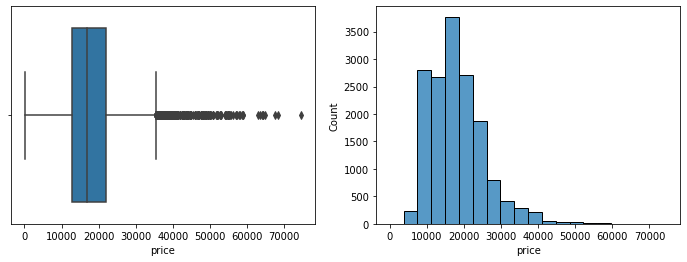

In [48]:
#Price

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(df.price)

plt.subplot(122)
sns.histplot(df.price,bins=20);

In [49]:
limit(df, "price")

Q1:  12850.0
Q3:  21900.0
IQR: 9050.0
-----------------------
Lower Limit: -725.0
Upper Limit: 35475.0


In [50]:
drop_outliers(df, "price")
df.price.describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [51]:
df.price.loc[df["price"] < 1000]

6066    255
8594     13
8828    120
8829    331
Name: price, dtype: int64

In [57]:
df["price"] = df.price.loc[df["price"] > 1000]
df.price.describe()

count    15915.000000
mean     18024.380584
std       7381.679318
min       4950.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [58]:
df["price"].describe()

count    15915.000000
mean     18024.380584
std       7381.679318
min       4950.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

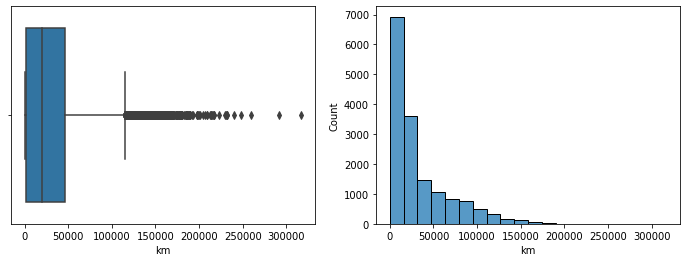

In [59]:
#km

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(df.km)

plt.subplot(122)
sns.histplot(df.km,bins=20);

In [60]:
limit(df, "km")

Q1:  1557.5
Q3:  46898.5
IQR: 45341.0
-----------------------
Lower Limit: -66454.0
Upper Limit: 114910.0


In [61]:
df["km"] = df.km.loc[df["km"] >= 0]
df.km.describe()

count     15919.000000
mean      31934.685219
std       37089.141710
min           0.000000
25%        1557.500000
50%       20400.000000
75%       46898.500000
max      317000.000000
Name: km, dtype: float64

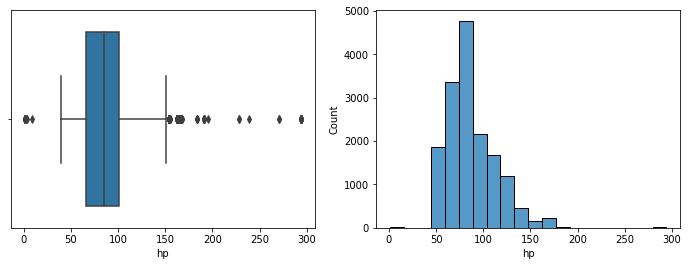

In [62]:
#hp

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(df.hp)

plt.subplot(122)
sns.histplot(df.hp,bins=20);

In [63]:
limit(df, "hp")

Q1:  66.0
Q3:  101.0
IQR: 35.0
-----------------------
Lower Limit: 13.5
Upper Limit: 153.5


In [64]:
drop_outliers(df, "hp")

0         66.0
1        141.0
2         85.0
3         66.0
4         66.0
         ...  
15911    118.0
15912    147.0
15914    147.0
15916    146.0
15917    147.0
Name: hp, Length: 15491, dtype: float64

In [65]:
df.hp.describe()

count    15919.000000
mean        88.382280
std         26.826156
min          1.000000
25%         66.000000
50%         85.000000
75%        101.000000
max        294.000000
Name: hp, dtype: float64

In [66]:
df["hp"] = df.hp.loc[df["hp"] >50]
df.hp.describe()

count    15894.000000
mean        88.511420
std         26.643688
min         51.000000
25%         66.000000
50%         85.000000
75%        101.000000
max        294.000000
Name: hp, dtype: float64

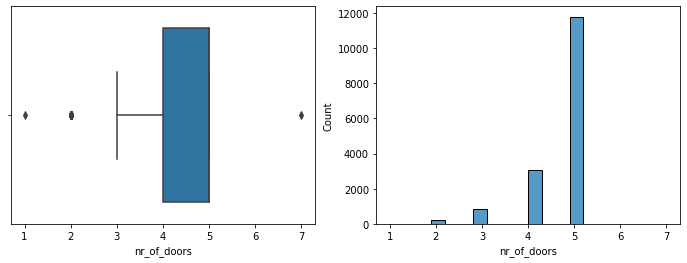

In [67]:
#nr_of_doors

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(df.nr_of_doors)

plt.subplot(122)
sns.histplot(df.nr_of_doors,bins=20);

In [68]:
df["nr_of_doors"] = df.nr_of_doors.loc[ ~((df["nr_of_doors"] < 2) | (df["nr_of_doors"] > 6))]

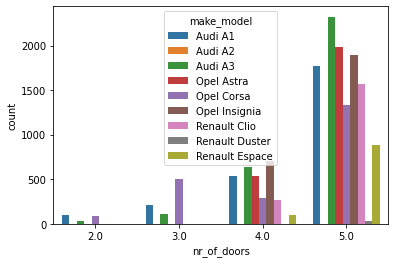

In [69]:
sns.countplot(df.nr_of_doors, hue = df.make_model);

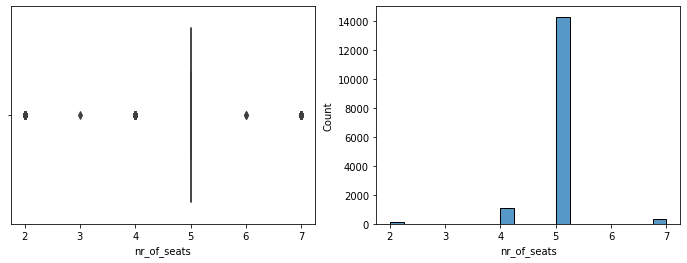

In [70]:
# nr_of_seats

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(df.nr_of_seats)

plt.subplot(122)
sns.histplot(df.nr_of_seats,bins=20);

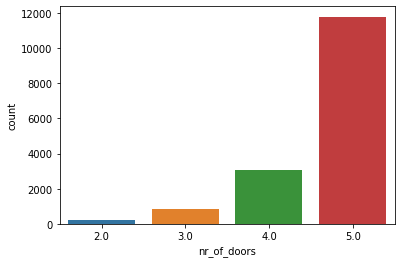

In [71]:
sns.countplot(df.nr_of_doors);

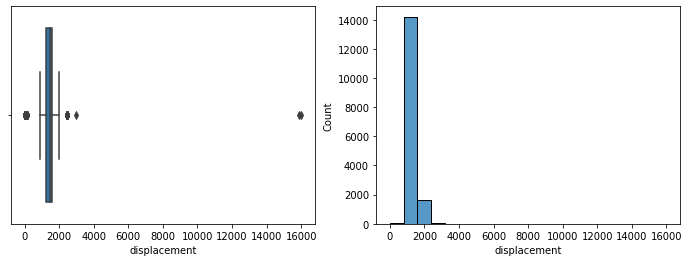

In [72]:
# displacement

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(df.displacement)

plt.subplot(122)
sns.histplot(df.displacement,bins=20);

In [73]:
limit(df, "displacement")

Q1:  1229.0
Q3:  1598.0
IQR: 369.0
-----------------------
Lower Limit: 675.5
Upper Limit: 2151.5


In [74]:
drop_outliers(df, "displacement")
df.displacement.describe()

count    15919.000000
mean      1425.376406
std        331.300394
min          1.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max      16000.000000
Name: displacement, dtype: float64

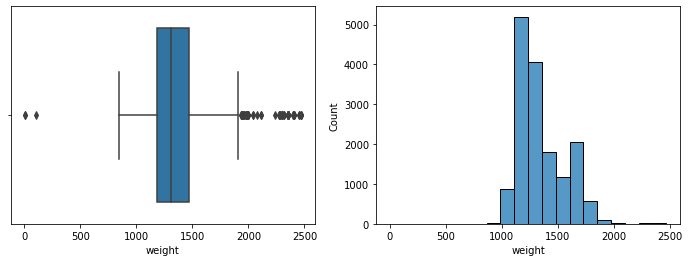

In [75]:
# weight

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(df.weight)

plt.subplot(122)
sns.histplot(df.weight,bins=20);

In [76]:
limit(df, "weight")

Q1:  1180.0
Q3:  1472.0
IQR: 292.0
-----------------------
Lower Limit: 742.0
Upper Limit: 1910.0


In [77]:
drop_outliers(df, "weight")

0        1220.0
1        1255.0
2        1195.0
3        1195.0
4        1195.0
          ...  
15914    1758.0
15915    1708.0
15916    1685.0
15917    1758.0
15918    1685.0
Name: weight, Length: 15827, dtype: float64

In [78]:
df["weight"] = df.weight.loc[ ~((df["weight"] < 742.0) | (df["weight"] > 1910.0))]

In [79]:
df.weight.describe()

count    15827.000000
mean      1341.033455
std        192.452258
min        840.000000
25%       1180.000000
50%       1308.000000
75%       1455.000000
max       1905.000000
Name: weight, dtype: float64

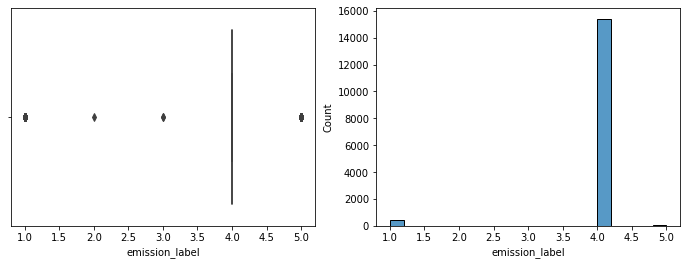

In [80]:
# emission_label

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(df.emission_label)

plt.subplot(122)
sns.histplot(df.emission_label,bins=20);

In [81]:
limit(df, "emission_label")

Q1:  4.0
Q3:  4.0
IQR: 0.0
-----------------------
Lower Limit: 4.0
Upper Limit: 4.0


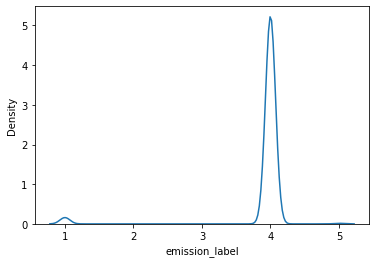

In [82]:
sns.kdeplot(df.emission_label);

In [83]:
df.emission_label.value_counts()

4.0    15405
1.0      468
5.0       43
3.0        2
2.0        1
Name: emission_label, dtype: int64

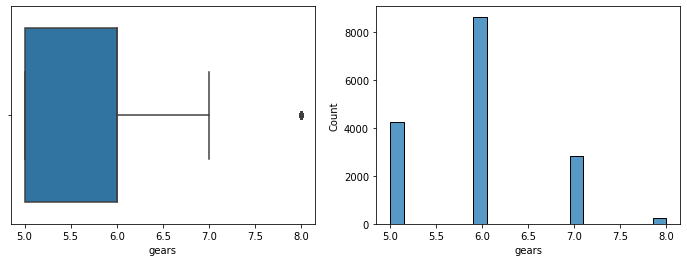

In [84]:
# gears

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(df.gears)

plt.subplot(122)
sns.histplot(df.gears,bins=20);

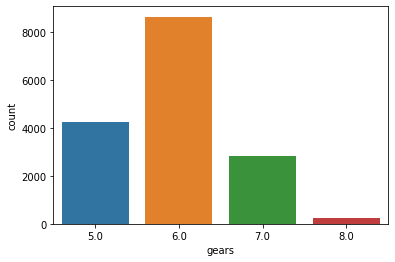

In [85]:
sns.countplot(df.gears);

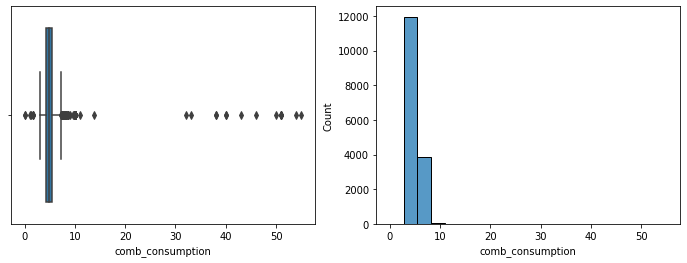

In [86]:
# comb_consumption

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(df.comb_consumption)

plt.subplot(122)
sns.histplot(df.comb_consumption,bins=20);

In [87]:
limit(df, "comb_consumption")

Q1:  4.2
Q3:  5.412313937753721
IQR: 1.2123139377537209
-----------------------
Lower Limit: 2.381529093369419
Upper Limit: 7.230784844384303


In [88]:
drop_outliers(df, "comb_consumption")

0        3.8
1        5.6
2        3.8
3        3.8
4        4.1
        ... 
15913    6.8
15914    5.3
15916    5.3
15917    5.3
15918    6.8
Name: comb_consumption, Length: 15733, dtype: float64

In [89]:
df.comb_consumption.describe()

count    15919.000000
mean         4.891713
std          1.542829
min          0.000000
25%          4.200000
50%          4.800000
75%          5.412314
max         55.000000
Name: comb_consumption, dtype: float64

In [94]:
df.dropna(inplace=True)

In [95]:
df.to_csv("autoscout_outliers.csv", index=False)

In [ ]:
df.select_dtypes('number').columns

In [99]:

del df["emission_class"]

In [101]:
df_dummy = pd.get_dummies(data=df, drop_first=True)
df_dummy

,price,km,hp,previous_owners,nr_of_doors,nr_of_seats,displacement,weight,emission_label,gears,...,warranty_warranty,paint_type_Uni/basic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,fuel_Diesel,fuel_LPG/CNG,fuel_Other,inspection_new_Yes
0,15770.0,56013,66.0,2.0,5.0,5.0,1422.0,1220.0,4.0,7.0,...,0,0,0,0,1,0,1,0,0,1
1,14500.0,80000,141.0,2.0,3.0,4.0,1798.0,1255.0,4.0,7.0,...,0,1,0,0,1,0,0,0,0,0
2,14640.0,83450,85.0,1.0,4.0,4.0,1598.0,1195.0,4.0,7.0,...,0,0,0,0,1,0,1,0,0,0
3,14500.0,73000,66.0,1.0,3.0,4.0,1422.0,1195.0,4.0,6.0,...,0,0,0,0,1,0,1,0,0,0
4,16790.0,16200,66.0,1.0,5.0,5.0,1422.0,1195.0,4.0,7.0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,39950.0,0,147.0,1.0,5.0,5.0,1997.0,1758.0,4.0,6.0,...,1,0,0,0,1,0,1,0,0,0
15915,39885.0,9900,165.0,1.0,5.0,5.0,1798.0,1708.0,4.0,7.0,...,0,0,0,0,1,0,0,0,0,0
15916,39875.0,15,146.0,1.0,5.0,7.0,1997.0,1685.0,4.0,6.0,...,0,1,0,0,1,0,1,0,0,1
15917,39700.0,10,147.0,1.0,5.0,7.0,1997.0,1758.0,4.0,6.0,...,0,1,0,0,1,0,1,0,0,0


In [102]:
df_dummy.to_csv("autoscout_with_dummy.csv", index=False)